Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


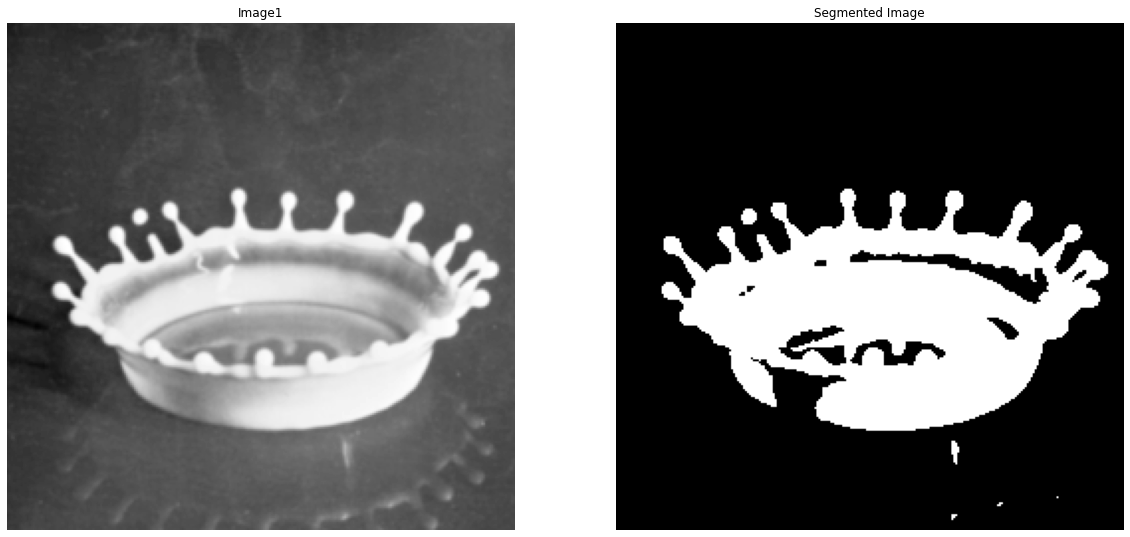

In [3]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/milkdrop.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 초기 임계값, 이전 임계값 저장 변수, 종료 조건 임계값 설정   
T1=50
T2=0
T0=1
# 임계값 적용 후 이진 영상을 담을 기억 장소 생성 
output_img =np.zeros((gray_img.shape[0],gray_img.shape[1]))

# 각 그룹별 평균값으로 새로운 임계값 계산하는 함수
def threshold_update(h, w, img, output,T1): #saturation함수로 정의하기
   sum1=0
   count1=1
   sum2=0
   count2=1
   for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      # 그룹별 픽셀 총합 계산
      if(output[h,w]==255):
         sum1 = sum1+ img[h,w]
         count1 = count1+1
    else:
        sum2 = sum2+ img[h,w]
        count2 = count2+1
   # 그룹별 픽셀 평균 계산    
   ave1 = sum1/count1 
   ave2 = sum2/count2
   # 평균으로 새로운 임계값 계산
   T2 = np.int32(ave1+ave2)/2
   return T2

#1) 영상 초기 임계값 적용 하기
for h in range(gray_img.shape[0]):
  for w in range(gray_img.shape[1]):
    if(gray_img[h,w]>T1):
        output_img[h,w]=255
    else:
        output_img[h,w]=0 

#2) 종료 조건을 만족할 때 까지 계속 반복
while True:
  #새로운 임계값 생성을 위한 함수 호출
  T2 = threshold_update(gray_img.shape[0], gray_img.shape[1], gray_img, output_img,T1)
  #새로운 임계값과 이전 임계값의 변화 측정
  if(np.abs(T1-T2)<T0):
    # 종료 조건을 만족하면 새로운 임계값으로 영상 이진화 후 출력
    for h in range(gray_img.shape[0]):
      for w in range(gray_img.shape[1]):
        if(gray_img[h,w]>T2):
          output_img[h,w]=255
        else:
          output_img[h,w]=0
    break
  #종료 조건을 만족하지 않는다면
  else:
     # 새로운 임계값으로 다시 이진화 작업
     T1 = T2
     for h in range(gray_img.shape[0]):
      for w in range(gray_img.shape[1]):
        if(gray_img[h,w]>T1):
          output_img[h,w]=255
        else:
          output_img[h,w]=0

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Segmented Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)